In [1]:
!pip install spotipy

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="0b60d507d4b248f99c80b1ffc5a36967",
                                                           client_secret="f787e13397454fbfa11e8f843a8506b0"))


In [3]:
playlist_id= "37i9dQZEVXbMDoHDwVN2tF"


In [4]:

def playlist_songs(playlist):
    songs = []
    results = sp.playlist_tracks(playlist)
    songs.extend(results['items'])
 
    while results['next']:
        results = sp.next(results)
        songs.extend(results['items'])
    
    return songs


In [5]:
def get_albums(artist_id): 
    albums = []
    results = sp.artist_albums(artist_id, album_type='album') 
    albums.extend(results['items'])
    
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])
    
    return albums

In [6]:
def album_songs(album_id):
    results = sp.album_tracks(album_id)
    return results['items']


In [7]:
def get_audio_features(track_ids):
    return sp.audio_features(track_ids)

In [8]:
def collect_songs(playlist_id):
    songs = playlist_songs(playlist_id)
    artist_ids = set()
    track_ids = []
    
 
    for item in songs:
        song = item['track']
        for artist in song['artists']:
            artist_ids.add(artist['id'])
    
   
    all_songs = []
    for artist_id in artist_ids:
        albums = get_albums(artist_id)
        for album in albums:
            album_tracks = album_songs(album['id'])
            all_songs.extend(album_tracks)
            for track in album_tracks:
                track_ids.append(track['id'])  
    
    return all_songs, track_ids


In [9]:
all_songs, track_ids  = collect_songs(playlist_id)

In [10]:
len(all_songs)

3970

In [11]:
import pandas as pd
pd.json_normalize(sp.audio_features(track_ids[100:200]))


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.624,0.544,7,-8.004,1,0.0998,0.33700,0.000003,0.1220,0.293,87.931,audio_features,66p59VAALXRlp777aP1Wom,spotify:track:66p59VAALXRlp777aP1Wom,https://api.spotify.com/v1/tracks/66p59VAALXRl...,https://api.spotify.com/v1/audio-analysis/66p5...,159852,4
1,0.702,0.659,4,-6.766,0,0.1300,0.30100,0.002010,0.2180,0.843,79.640,audio_features,1otG6j1WHNvl9WgXLWkHTo,spotify:track:1otG6j1WHNvl9WgXLWkHTo,https://api.spotify.com/v1/tracks/1otG6j1WHNvl...,https://api.spotify.com/v1/audio-analysis/1otG...,207455,4
2,0.700,0.812,3,-4.800,1,0.0311,0.02450,0.000000,0.1020,0.855,107.983,audio_features,5RcuACCOhgoc4ZH57AVCLA,spotify:track:5RcuACCOhgoc4ZH57AVCLA,https://api.spotify.com/v1/tracks/5RcuACCOhgoc...,https://api.spotify.com/v1/audio-analysis/5Rcu...,185239,4
3,0.622,0.638,0,-6.291,1,0.0430,0.12900,0.000010,0.3620,0.646,140.005,audio_features,5n1WeUNWJIjs9ueYD4v0Pt,spotify:track:5n1WeUNWJIjs9ueYD4v0Pt,https://api.spotify.com/v1/tracks/5n1WeUNWJIjs...,https://api.spotify.com/v1/audio-analysis/5n1W...,172357,4
4,0.521,0.188,11,-6.301,1,0.0693,0.95000,0.000000,0.2290,0.469,52.181,audio_features,34E2yJTGNWElxDetLk4on5,spotify:track:34E2yJTGNWElxDetLk4on5,https://api.spotify.com/v1/tracks/34E2yJTGNWEl...,https://api.spotify.com/v1/audio-analysis/34E2...,111509,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.567,0.856,6,-5.852,1,0.0293,0.05510,0.000072,0.1170,0.390,122.022,audio_features,0oPRfdP48RM4bd3xBFyiRo,spotify:track:0oPRfdP48RM4bd3xBFyiRo,https://api.spotify.com/v1/tracks/0oPRfdP48RM4...,https://api.spotify.com/v1/audio-analysis/0oPR...,223968,4
96,0.501,0.831,5,-5.485,1,0.0366,0.17800,0.000000,0.3080,0.394,146.083,audio_features,68eDGmSTQgxJde9JTG7b71,spotify:track:68eDGmSTQgxJde9JTG7b71,https://api.spotify.com/v1/tracks/68eDGmSTQgxJ...,https://api.spotify.com/v1/audio-analysis/68eD...,174741,4
97,0.476,0.848,6,-4.799,1,0.0317,0.05830,0.000000,0.0824,0.531,76.005,audio_features,7ya4zrCKDslIfrztqglRIP,spotify:track:7ya4zrCKDslIfrztqglRIP,https://api.spotify.com/v1/tracks/7ya4zrCKDslI...,https://api.spotify.com/v1/audio-analysis/7ya4...,198255,4
98,0.350,0.787,2,-6.081,1,0.0327,0.00684,0.000940,0.0827,0.226,74.593,audio_features,09UUDUFaudMcUkocm2iqR8,spotify:track:09UUDUFaudMcUkocm2iqR8,https://api.spotify.com/v1/tracks/09UUDUFaudMc...,https://api.spotify.com/v1/audio-analysis/09UU...,175159,4


In [12]:
artist_names = []
song_title = []


for item in all_songs:
    song_title.append(item['artists'][0]['name'])
    artist_names.append(item['name'])


In [13]:
start = 0
df = pd.DataFrame()

for stop in range(0, len(track_ids)+100, 100):
    if start != stop:
        print(start, stop)
        new_df = pd.json_normalize(sp.audio_features(track_ids[start:stop]))
        new_df['song_title'] = artist_names[start:stop]
        new_df['artist_name'] = song_title[start:stop]
        new_df = new_df[['artist_name', 'song_title'] + [col for col in new_df.columns if col not in ['artist_name', 'song_title']]]
    
        df = pd.concat([new_df, df])
        start = stop

df.reset_index()

0 100
100 200
200 300
300 400
400 500
500 600
600 700
700 800
800 900
900 1000
1000 1100
1100 1200
1200 1300
1300 1400
1400 1500
1500 1600
1600 1700
1700 1800
1800 1900
1900 2000
2000 2100
2100 2200
2200 2300
2300 2400
2400 2500
2500 2600
2600 2700
2700 2800
2800 2900
2900 3000
3000 3100
3100 3200
3200 3300
3300 3400
3400 3500
3500 3600
3600 3700
3700 3800
3800 3900
3900 4000


,index,artist_name,song_title,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Gracie Abrams,Felt Good About You,0.560,0.570,0.0,-8.911,1.0,0.3630,0.8110,...,0.1040,0.359,191.946,audio_features,5bjB0xPlN7fR1roEedzQvg,spotify:track:5bjB0xPlN7fR1roEedzQvg,https://api.spotify.com/v1/tracks/5bjB0xPlN7fR...,https://api.spotify.com/v1/audio-analysis/5bjB...,164693.0,4.0
1,1,Gracie Abrams,Risk,0.708,0.482,3.0,-6.032,0.0,0.0729,0.5200,...,0.1420,0.486,113.003,audio_features,6KJUSJHXRrTjSMpi9PzjEy,spotify:track:6KJUSJHXRrTjSMpi9PzjEy,https://api.spotify.com/v1/tracks/6KJUSJHXRrTj...,https://api.spotify.com/v1/audio-analysis/6KJU...,191587.0,4.0
2,2,Gracie Abrams,Blowing Smoke,0.620,0.644,11.0,-5.190,1.0,0.0863,0.2530,...,0.0872,0.387,139.998,audio_features,7yjPDFhCUFGa90GKORcUTY,spotify:track:7yjPDFhCUFGa90GKORcUTY,https://api.spotify.com/v1/tracks/7yjPDFhCUFGa...,https://api.spotify.com/v1/audio-analysis/7yjP...,232280.0,4.0
3,3,Gracie Abrams,"I Love You, I'm Sorry",0.501,0.401,10.0,-7.507,1.0,0.0350,0.6370,...,0.1330,0.341,116.405,audio_features,5W4FHsvv4PwqC5gYzXyrLI,spotify:track:5W4FHsvv4PwqC5gYzXyrLI,https://api.spotify.com/v1/tracks/5W4FHsvv4Pwq...,https://api.spotify.com/v1/audio-analysis/5W4F...,157147.0,3.0
4,4,Gracie Abrams,us. (feat. Taylor Swift),0.316,0.554,7.0,-6.447,1.0,0.0362,0.4980,...,0.0915,0.378,102.220,audio_features,5WcsxoURbNjQPQvzKpHUMn,spotify:track:5WcsxoURbNjQPQvzKpHUMn,https://api.spotify.com/v1/tracks/5WcsxoURbNjQ...,https://api.spotify.com/v1/audio-analysis/5Wcs...,242667.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,95,Kali Uchis,Dead To Me,0.675,0.761,4.0,-4.469,0.0,0.0466,0.4320,...,0.1020,0.428,119.001,audio_features,6LOZws7T3jqZz78unPgFF9,spotify:track:6LOZws7T3jqZz78unPgFF9,https://api.spotify.com/v1/tracks/6LOZws7T3jqZ...,https://api.spotify.com/v1/audio-analysis/6LOZ...,199506.0,4.0
3966,96,Kali Uchis,Nuestro Planeta (feat. Reykon),0.871,0.550,0.0,-6.113,0.0,0.0613,0.0927,...,0.0788,0.448,96.018,audio_features,12TOa8pzhbLTWh1vxIsPMp,spotify:track:12TOa8pzhbLTWh1vxIsPMp,https://api.spotify.com/v1/tracks/12TOa8pzhbLT...,https://api.spotify.com/v1/audio-analysis/12TO...,202755.0,4.0
3967,97,Kali Uchis,In My Dreams,0.606,0.839,0.0,-5.115,1.0,0.0297,0.0195,...,0.1500,0.907,165.951,audio_features,2dDzrUEDCKXaLViMPa1jo5,spotify:track:2dDzrUEDCKXaLViMPa1jo5,https://api.spotify.com/v1/tracks/2dDzrUEDCKXa...,https://api.spotify.com/v1/audio-analysis/2dDz...,201000.0,4.0
3968,98,Kali Uchis,Gotta Get Up - Interlude,0.488,0.381,3.0,-8.095,0.0,0.0498,0.6050,...,0.0776,0.217,140.941,audio_features,7N3c9CKUmRqrt3dDvGWBWG,spotify:track:7N3c9CKUmRqrt3dDvGWBWG,https://api.spotify.com/v1/tracks/7N3c9CKUmRqr...,https://api.spotify.com/v1/audio-analysis/7N3c...,113270.0,4.0


In [14]:
print(df.shape)


(3970, 20)


In [15]:
columns = df.columns


print(columns)

Index(['artist_name', 'song_title', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')


In [16]:
columns_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
df = df.drop(columns=columns_to_drop)

KMEANS

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df
feature_names = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']




In [18]:
df.isnull().sum()


artist_name         0
song_title          0
danceability        8
energy              8
key                 8
loudness            8
mode                8
speechiness         8
acousticness        8
instrumentalness    8
liveness            8
valence             8
tempo               8
dtype: int64

In [19]:
df = df.fillna(0)

In [20]:
X = df[feature_names]
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.560,0.570,0.0,-8.911,1.0,0.3630,0.811,0.0,0.1040,0.359,191.946
1,0.708,0.482,3.0,-6.032,0.0,0.0729,0.520,0.0,0.1420,0.486,113.003
2,0.620,0.644,11.0,-5.190,1.0,0.0863,0.253,0.0,0.0872,0.387,139.998
3,0.501,0.401,10.0,-7.507,1.0,0.0350,0.637,0.0,0.1330,0.341,116.405
4,0.316,0.554,7.0,-6.447,1.0,0.0362,0.498,0.0,0.0915,0.378,102.220


In [21]:
X_prep = StandardScaler().fit_transform(X)
X_prep


array([[-0.18545371, -0.45841997, -1.43952238, ..., -0.63197241,
        -0.41398514,  2.46285131],
       [ 0.74828598, -0.90704583, -0.60372501, ..., -0.45441643,
         0.11879486, -0.23740958],
       [ 0.19308941, -0.0811664 ,  1.62506799, ..., -0.71047084,
        -0.29652183,  0.68595972],
       ...,
       [ 0.10476268,  0.91294772, -1.43952238, ..., -0.41703622,
         1.88493959,  1.57368721],
       [-0.63970545, -1.42194597, -0.60372501, ..., -0.75532708,
        -1.00969191,  0.71821522],
       [ 0.34450665, -0.35136152, -0.88232413, ..., -0.45908895,
         0.15235581, -0.4415804 ]])

In [22]:
K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

inertia

C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\clust

[37225.78639160966,
 33920.011269223505,
 31273.12566160471,
 28770.16484468698,
 26770.205043057875,
 25414.302010254887,
 24178.56404269766,
 23173.943167919995,
 22347.878529494297,
 21683.44884790994,
 21017.815037553424,
 20528.839931390095,
 20122.06150470423,
 19699.441530157645,
 19269.68975686706,
 18955.32753402581,
 18602.24917834895,
 18212.76357831403]

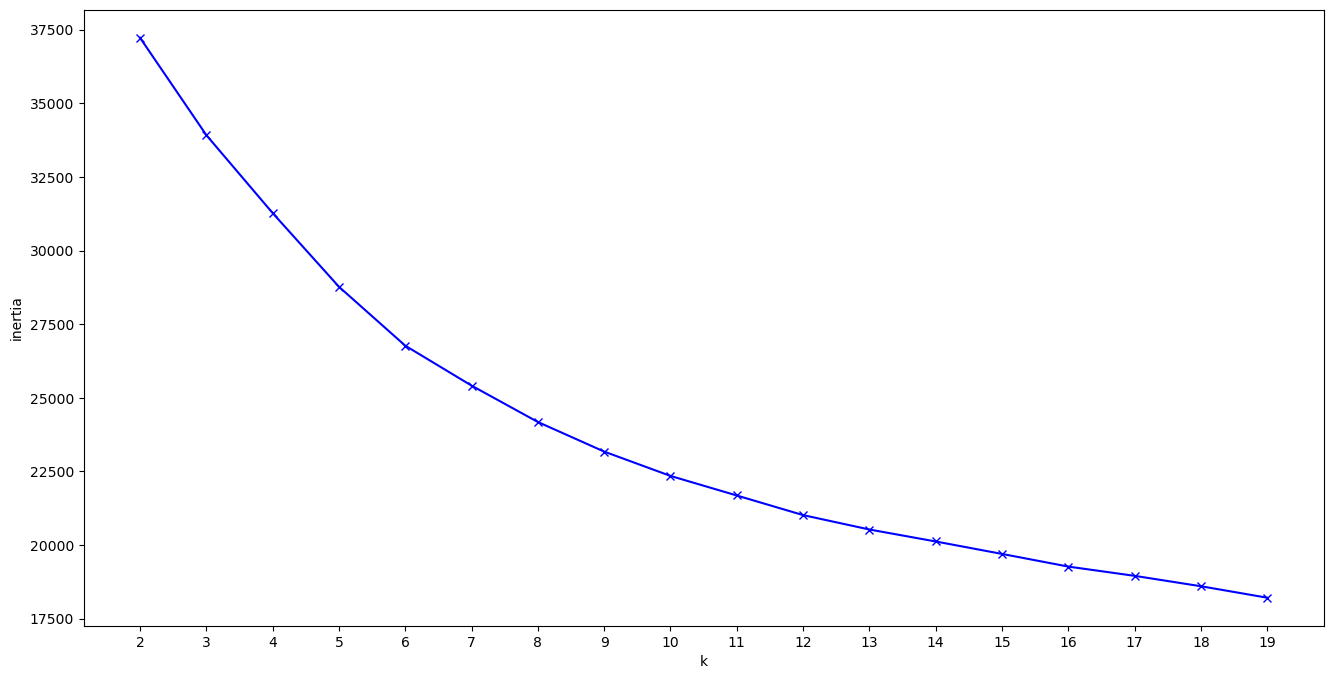

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\clust

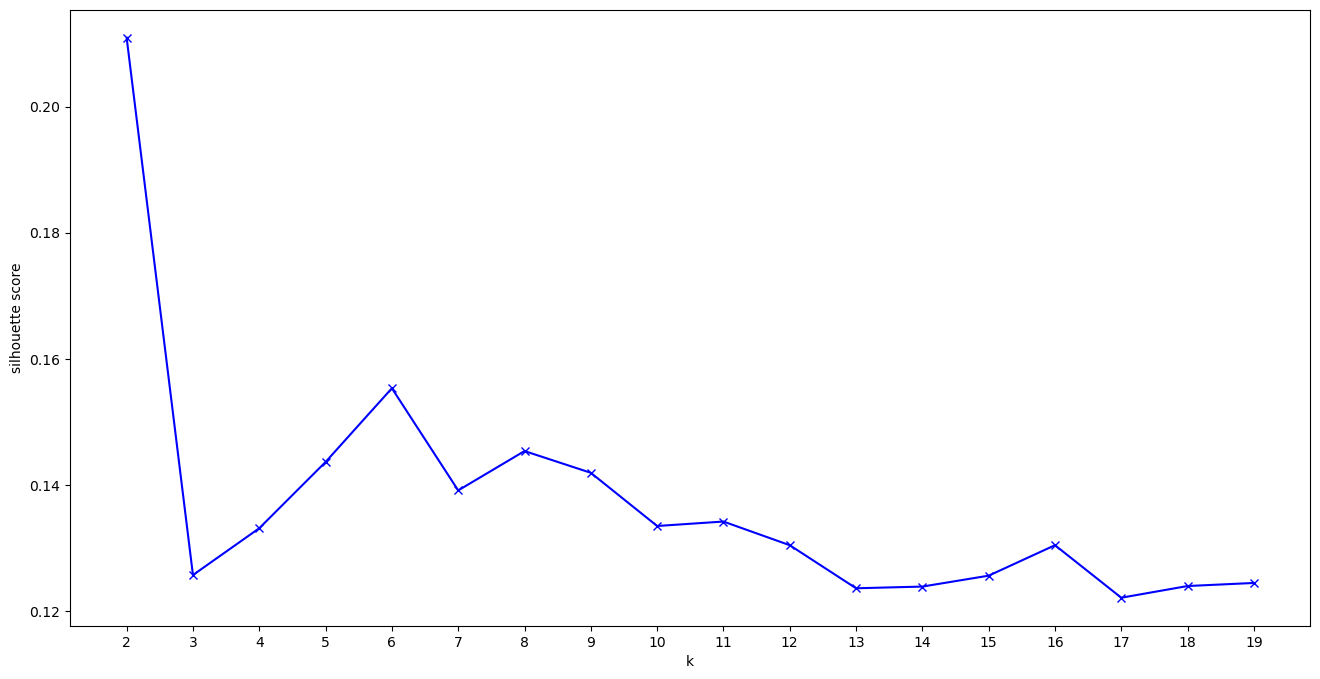

In [24]:
from sklearn.metrics import silhouette_score
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [25]:
kmeans.inertia_

18212.76357831403

Vizualisingthe data

In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Transform the data into 2D so we can see
pca = PCA(2)
X_2D = pca.fit_transform(X_prep)
X_2D

array([[ 1.46898813, -0.39754671],
       [ 0.38295555, -1.20829533],
       [-0.30644266, -0.40496759],
       ...,
       [-2.00417689, -0.61638717],
       [ 1.8876947 , -0.46507327],
       [-0.19917956, -0.59264686]])

In [27]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_2D)

C:\Users\kaohs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [28]:
clusters = kmeans.predict(X_2D)
clusters

array([1, 2, 2, ..., 0, 1, 2])

In [29]:
labels = np.unique(clusters)
labels

array([0, 1, 2, 3, 4, 5])

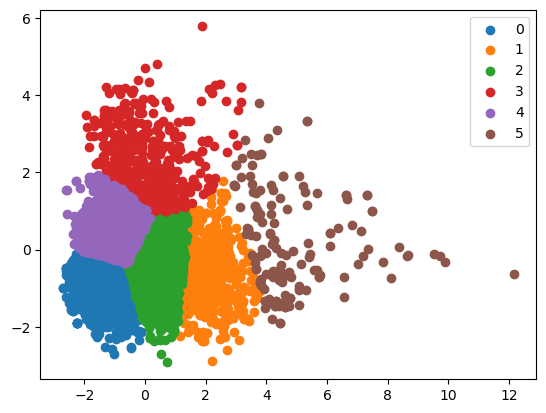

In [30]:
for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

In [31]:
df_2D = pd.DataFrame(X_2D)
df_2D['cluster'] = clusters 
df_2D

,0,1,cluster
0,1.468988,-0.397547,1
1,0.382956,-1.208295,2
2,-0.306443,-0.404968,2
3,1.688980,-0.884868,1
4,1.321310,-0.202739,2
...,...,...,...
3965,-0.611164,-0.550505,0
3966,-0.611529,-1.427314,0
3967,-2.004177,-0.616387,0
3968,1.887695,-0.465073,1


In [32]:
clusters = pd.Series(clusters).apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2 if x == 3 else 3 if x == 4 else 4 if x == 5 else 5)
df['cluster'] = df_2D['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2 if x == 3 else 3 if x == 4 else 4 if x == 5 else 5)

y=df['cluster']

df

,artist_name,song_title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Gracie Abrams,Felt Good About You,0.560,0.570,0.0,-8.911,1.0,0.3630,0.8110,0.000000,0.1040,0.359,191.946,0
1,Gracie Abrams,Risk,0.708,0.482,3.0,-6.032,0.0,0.0729,0.5200,0.000000,0.1420,0.486,113.003,1
2,Gracie Abrams,Blowing Smoke,0.620,0.644,11.0,-5.190,1.0,0.0863,0.2530,0.000000,0.0872,0.387,139.998,1
3,Gracie Abrams,"I Love You, I'm Sorry",0.501,0.401,10.0,-7.507,1.0,0.0350,0.6370,0.000000,0.1330,0.341,116.405,0
4,Gracie Abrams,us. (feat. Taylor Swift),0.316,0.554,7.0,-6.447,1.0,0.0362,0.4980,0.000000,0.0915,0.378,102.220,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kali Uchis,Dead To Me,0.675,0.761,4.0,-4.469,0.0,0.0466,0.4320,0.000000,0.1020,0.428,119.001,1
96,Kali Uchis,Nuestro Planeta (feat. Reykon),0.871,0.550,0.0,-6.113,0.0,0.0613,0.0927,0.000742,0.0788,0.448,96.018,3
97,Kali Uchis,In My Dreams,0.606,0.839,0.0,-5.115,1.0,0.0297,0.0195,0.000020,0.1500,0.907,165.951,1
98,Kali Uchis,Gotta Get Up - Interlude,0.488,0.381,3.0,-8.095,0.0,0.0498,0.6050,0.087200,0.0776,0.217,140.941,3


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y,clusters))

              precision    recall  f1-score   support

           0       0.36      0.13      0.19      1318
           1       0.33      0.28      0.31      1232
           2       0.07      0.12      0.09       273
           3       0.12      0.27      0.17       432
           4       0.15      0.06      0.08       398
           5       0.09      0.24      0.13       317

    accuracy                           0.19      3970
   macro avg       0.19      0.18      0.16      3970
weighted avg       0.26      0.19      0.20      3970



This is a terrible model because the precision and recall score is low for all the lines. 

In [34]:
#Extraction from 100 BILLBOARD

from bs4 import BeautifulSoup
import pandas as pd
import requests


r = requests.get('https://www.billboard.com/charts/hot-100/').content
soup = BeautifulSoup(r, 'html.parser')
title=soup.find_all('h3', attrs={'class': "c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only"})
title1=soup.find_all('h3', attrs={'class': "c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet"})
all_title=title1+title
titles = [songs.get_text(strip=True) for songs in all_title]

artists = soup.find_all("span", attrs={"class": "c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only"})
artist1=soup.find_all("span", attrs={"class": "c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet"})
all_artists= artist1+artists
singers=[artists.get_text(strip=True) for artists in all_artists]

billboard= pd.DataFrame(zip(singers, titles), columns=["artist_name", "song_title"])

In [ ]:
import pandas as pd
import random


# Function to check if a song is in the Billboard DataFrame
def is_song_in_billboard(song_title, artist_name):
    return not billboard[(billboard[ "song_title"].str.lower() == song_title.lower()) & 
                         (billboard["artist_name"].str.lower() == artist_name.lower())].empty

# Function to get the cluster of a song from the df DataFrame
def get_song_cluster(song_title, artist_name):
    song_entry = df[(df[ "song_title"].str.lower() == song_title.lower()) & 
                    (df["artist_name"].str.lower() == artist_name.lower())]
    if not song_entry.empty:
        return song_entry.iloc[0]['cluster']
    return None

# Function to recommend another song from a given cluster
def recommend_song_from_cluster(cluster_number):
    # Find songs in the same cluster
    same_cluster_songs = df[df['cluster'] == cluster_number]
    if not same_cluster_songs.empty:
        # Randomly select a song from the same cluster
        recommended_song = same_cluster_songs.sample(1).iloc[0]
        return recommended_song['song_title'], recommended_song['artist_name']
    return None, None

# Main function to handle the user input and song recommendation
def recommend_song(song_title, artist_name):
    if is_song_in_billboard(song_title, artist_name):
        # Recommend another song from the Billboard list
        other_songs = billboard[(billboard[ "song_title"].str.lower() != song_title.lower()) | 
                                (billboard["artist_name"].str.lower() != artist_name.lower())]
        if not other_songs.empty:
            recommended_song = other_songs.sample(1).iloc[0]
            return f"The song '{song_title}' by '{artist_name}' is in the Billboard list. You might also like '{recommended_song['song_title']}' by '{recommended_song['artist_name']}'."
    else:
        cluster_number = get_song_cluster(song_title, artist_name)
        if cluster_number is not None:
            # Recommend a song from the same cluster
            recommended_title, recommended_artist = recommend_song_from_cluster(cluster_number)
            if recommended_title and recommended_artist:
                return f"The song '{song_title}' by '{artist_name}' is not in the Billboard list but belongs to cluster {cluster_number}. You might also like '{recommended_title}' by '{recommended_artist}' from the same cluster."
            else:
                return "No other songs found in the same cluster to recommend."
        else:
            return "The song's audio features or cluster information could not be found in the dataset."

# Example usage
while True:  # Loop to allow multiple song entries
    song_title = input("Enter the song title (or 'exit' to quit): ")
    if song_title.lower() == 'exit':
        break
    artist_name = input("Enter the artist name: ")
    recommendation = recommend_song(song_title, artist_name)
    print(recommendation)


Enter the song title (or 'exit' to quit): Shape of You
Enter the artist name: Ed sheeran
The song's audio features or cluster information could not be found in the dataset.
Enter the song title (or 'exit' to quit): Tomorrow
Enter the artist name: Kali Uchis
The song 'Tomorrow' by 'Kali Uchis' is not in the Billboard list but belongs to cluster 1. You might also like 'Guess' by 'Charli xcx' from the same cluster.
